Im not meantr to thbe there
Im not meantr to thbe there
Im not meantr to thbe there
Im not meantr to thbe there
[0.09184423218221896, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


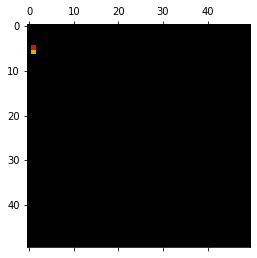

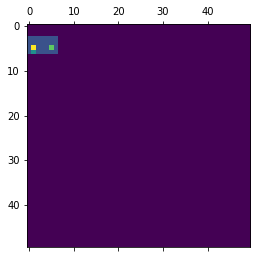

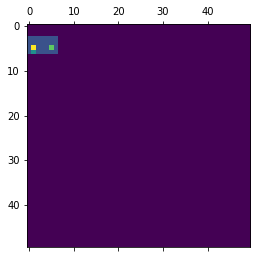

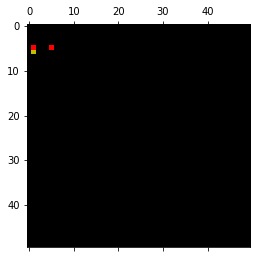

In [1]:

#Wireless sensor networm combined with autonomous drone swarm and communication reduction
#https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7391193&casa_token=wZ2spLDNZroAAAAA:YDmwxnfhCvPGV002JGv_1lSta5d7yBgcY3P0YYrw24wKr7-hJWuTdR5tTvuWe1Z4vZgFr-pgs8Y

import random as rand
import numpy as np
#rand.seed(1)
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import math
import gym
from copy import deepcopy

ViewRange = 2
CommRange = 5#5
AgentAmmount = 5

#double distance = 2/3 as efficient transfer
class Task:
    def __init__(self):
        self.priority = rand.randint(1, 10)
        self.size = rand.randint(100, 1000)



#Vessel
#Constraints: Bandwidth - Num of Chanels - communication distance
#Objective: Energy Reduction - Task priority 
class Drone:
    def __init__(self, x, y, viewRange, commRange, width, height, index, Sea):
        self.x = x
        self.y = y
        self.task = None
        self.viewRange = viewRange
        self.commRange = commRange
        self.observation = [[0]*width]*height
        self.id = index
        #self.seen = np.array([[0]*Sea.width]*Sea.height)
        self.obs = np.array([[0]*Sea.width]*Sea.height)
        self.punish = 0
        self.totalReward = 0
    def getView(self):
        return None

    def getObservation(self, Sea):
        #Get view
        #obs = np.array([[0]*Sea.width]*Sea.height)
        reward = 0 
        for i in range(self.y-self.viewRange, self.y+self.viewRange):
            for j in range(self.x-self.viewRange, self.x+self.viewRange):
                if i < 50 and i >= 0  and j < 50 and j >= 0:
                    if Sea.board[i][j] == 0:
                        self.obs[i][j] = 1
                    else:
                        self.obs[i][j] = Sea.board[i][j]

                    if Sea.seen[i][j] == 0:
                        Sea.seen[i][j] = 1
                        reward += 1
                        self.totalReward += 1
        reward += self.punish
        res = deepcopy(self.obs)
        #make them seperate
        reward = float(self.totalReward)/50/50
        reward = -1/(10*(reward - 1.1))

        res[self.y][self.x] = 3 + self.id
        return res, reward

    def move(self,x, y, see):
        x = x + self.x
        y = y + self.y

        self.punish = 0

        if (x < 50 and x >= 0 and y < 50 and y >= 0) and (see.board[y][x] == 0 or see.board[y][x] == 2 or see.board[y][x] == -2) :
            self.x = x
            self.y = y
        else:
            #punishment
            self.punish -= 4

    
    def addData(self, drone):
        pass
    def setData(self, obs):
        self.observation = abs
#Constraints: Bandwidth, Num of Chanels
#Objective Explore the sea
class Ship:
    def __init__(self, x, y, bandwidth):
        self.x = x
        self.y = y
        self.bandwidth = bandwidth


#Actions move up down left right 
class Sea:

    def __init__(self):#, width, height):
        self.width = 50#width
        self.height =50# height

        self.observe_dim = 50*50#env.observation_space[0].shape[0]
        self.action_num = 4
        self.max_step = 200
        self.state_dim = 50*50
        self.action_dim = 4
        self.target_return = 50*50
        self.env_num = 500
        self.if_discrete = True
        self.env_name = "Sea"
        self.reward_range = (-200*4, 50*50)
        #self.objects = objects
        #int array -2 = dead zone (ie no communication) -1 = object 0 = sea 1 = ship 2 = drone
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1

        self.cmap = ListedColormap([ 'k', 'b'])

    def calculateDeadZone2(self, board):
        shipx = self.ship.x
        shipy = self.ship.y

        for y in range(0, self.height):
            for x in range(0, self.width):
                if board[y][x] != 0:
                    continue
                startx = x
                starty = y
                x0 = startx
                y0 = starty
                x1 = shipx
                y1 = shipy
                dx = abs(x1 - x0)
                sx = -1
                if x0 < x1:
                    sx = 1
                dy = -abs(y1 - y0)
                sy = -1
                if y0 < y1:
                    sy = 1
                error = dx + dy

                while True:
                    if(board[y0][x0] == -1):
                        board[y][x] = -2
                        break
                    if x0 == x1 and y0 == y1:
                        break
                    e2 = 2 * error
                    if e2 >= dy:
                        if x0 == x1: 
                            break
                        error = error + dy
                        x0 = x0 + sx
                    
                    if e2 <= dx:
                        if y0 == y1:
                            break
                        error = error + dx
                        y0 = y0 + sy

    def AddShip(self, ship):
        self.ship = ship
        self.board[ship.y][ship.x] = 2
        for i in range(ship.y - 2, ship.y+2):
            for j in range(ship.x - 2, ship.x + 2):
                if i >= 0 and j >= 0 and i < self.height and j < self.width and self.board[i][j] == -1:
                    self.board[i][j] = 0

    def display(self):
        newBoard = np.copy(self.board)
        if ( hasattr(self, 'ship')):
            newBoard[self.ship.y][self.ship.x] = 2
            #self.calculateDeadZone2(newBoard)
            self.cmap = ListedColormap([ 'k',  'b', 'g', 'y', 'r'])

        for drone in self.drones:
            newBoard[drone.y][drone.x] = 3

        plt.matshow(newBoard, cmap=self.cmap)

    def interestMap(self):
        interest = [[0]*self.width]*self.height
        samples = np.random.multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 50)
        huh  = np.reshape(samples, (10,10))
        print(huh)
        plt.close()
        plt.matshow(huh)

    def reset(self):
        self.board = np.array( [ [0]*self.width]*self.height )
        #for obj in objects:
        #    self.board[obj.y][obj.x] = -1

        #for i in range(self.height):
        #    for j in range(self.width):
        #        rock = rand.randint(0, 30)
        #        if(rock == 0):
        #            self.board[i][j] = -1
        
        shipx = rand.randint(0, 49)
        shipy = rand.randint(1, 49)
        ship = Ship(shipx, shipy, 100)
        self.AddShip(ship)
        self.seen = np.array([[0]*50]*50)
        self.drones = []

        for i in range(AgentAmmount):
            self.drones.append(Drone(shipx, shipy-1,ViewRange, CommRange, self.width, self.height, i, self))
        observations, rewards = self.getObservation()

        return observations

    def step(self, actions):
        droneIdx= 0
        for act in actions:
            match act:
                case 0:
                    self.drones[droneIdx].move(1,0, self)
                case 1:
                    self.drones[droneIdx].move(-1,0, self)
                case 2:
                    self.drones[droneIdx].move(0,1, self)
                case 3:
                    self.drones[droneIdx].move(0, -1, self)
                case 4:
                    print("Im not meantr to thbe there")
            droneIdx+= 1
                
                
        #count  = [0] * AgentAmmount
        #for i in range(self.height):
        #    for j in range(self.width):
        #        for drone in self.drones:
        #            if drone.seen[i][j] == 1:
        #                count[drone.id] += 1
                        
        #reward = count / float(self.width*self.height)
        #reward = [t/float(self.width*self.height) for t in count]


        observations, rewards = self.getObservation()

        return observations, rewards, [False]*AgentAmmount, None

    def getObservation(self):
        currentIndex = 1
        droneConnection = [0]*AgentAmmount

        for drone in self.drones:
            
            for connectDrone in self.drones:
                if drone.id == connectDrone.id:
                    continue
                if (droneConnection[drone.id] == 0 or droneConnection[drone.id] != droneConnection[connectDrone.id]) \
                            and math.sqrt( (drone.x - connectDrone.x)**2 + (drone.y - connectDrone.y)**2 ) < CommRange:
                    #do stuff
                    if droneConnection[drone.id] == 0 and droneConnection[connectDrone.id] == 0:
                        droneConnection[drone.id] = currentIndex
                        droneConnection[connectDrone.id] = currentIndex
                        currentIndex += 1
                    elif droneConnection[drone.id] != 0 and droneConnection[connectDrone.id] != 0:
                        swap = droneConnection[connectDrone.id]
                        for i in droneConnection:
                            if i == swap:
                                i = droneConnection[drone.id]
                    else:
                        if(droneConnection[drone.id] == 0):
                            droneConnection[drone.id] = droneConnection[connectDrone.id]
                        else:
                            droneConnection[connectDrone.id] = droneConnection[drone.id]

        for t in range(len(droneConnection)):
            if droneConnection[t] == 0:
                droneConnection[t] = currentIndex
                currentIndex += 1

        obsDict = {}
        rewardList = [0] * AgentAmmount
        index = 0
        for i in droneConnection:

            values, reward = self.drones[index].getObservation(self)

            if str(i) in obsDict:
                values = np.array(values).flatten()
                curr = obsDict[str(i)]
                
                for i in range(len(curr)):
                    
                    if(curr[i] == 1 and values[i] != 0):
                        curr[i] = values[i]
                    if(curr[i] == 0):
                        curr[i] = values[i]

            else:
                obsDict[str(i)] = np.array(values).flatten()
            
            rewardList[index]= reward
            index += 1

        observations = []


        for i in droneConnection:
            observations.append(obsDict[str(i)])

        for index, i in enumerate(observations):
            t = deepcopy(i)
            t[t == 3] = 1
            t[ t == 4] = 1
            t[t == 5 ] = 1
            t[t == 6 ] = 1
            t[ t == 7 ] = 1
            t[ t == 8 ] = 1
            self.drones[index].obs = np.reshape(t, (50,50))


        return observations, rewardList
class Object:
    def __init__(self, x, y):
        self.x = x
        self.y = y 

see = Sea()#50, 50)

see.reset()
#obs, reward, _, _ = see.step([0, 1])
#plt.matshow( np.reshape(obs[0], (50,50)) )
#plt.matshow( np.reshape(obs[1], (50,50)) )
see.display()
obs, reward, _, _ = see.step([0, 4])
obs, reward, _, _ = see.step([0, 4])
obs, reward, _, _ = see.step([0, 4])
obs, reward, _, _ = see.step([0, 4])
plt.matshow( np.reshape(obs[0], (50,50)) )
plt.matshow( np.reshape(obs[1], (50,50)) )
see.display()
#plt.matshow(seen)
print(reward)
#obs, reward, _, _ = see.step([0, 1])
#plt.matshow( np.reshape(obs[0], (50,50)) )
#plt.matshow( np.reshape(obs[1], (50,50)) )
#see.display()

#print(reward)



4.0
0.0


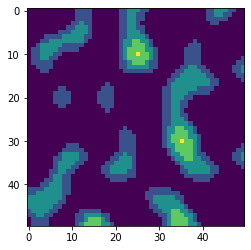

In [2]:
def perlin(x, y):
    # permutation table
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)  # FIX1: I was using n10 instead of n01
    return lerp(x1, x2, v)  # FIX2: I also had to reverse x1 and x2 here

def lerp(a, b, x):
    "linear interpolation"
    return a + x * (b - a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

lin = np.linspace(0, 5, 50, endpoint=False)
x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake
data = perlin(x, y)
data = data*7
data = np.round(data)
data[data < 0] = 0
print(data.max())
print(data.min())
plt.imshow(data, origin='upper')

In [2]:
from machin.frame.algorithms import MADDPG 

from machin.frame.algorithms import MADDPG
from machin.utils.logging import default_logger as logger
from copy import deepcopy
import torch as t
import torch.nn as nn
import machin.model.nets as net
#https://github.com/instadeepai/Mava
#https://github.com/PHRABAL/Tennis-MADDPG-PER/blob/master/MADDPG_PER.ipynb
#Same, playing around with the initialization, parameters, optimizers and normalization really helped Here is the article how I fought it:

#TL,DR: critic init sould match the reward distro. Minmax values should be meaningful. Delayed update for actor is good, so is gradient clipping and weight decay. \
# Use Adamw/RAdam/Ranger as an optimizer.

#https://towardsdatascience.com/reinforcement-learning-ddpg-and-td3-for-news-recommendation-d3cddec26011?source=activity---post_recommended

# Important note:
# In order to successfully run the environment, please git clone the project
# then run:
#    pip install -e ./test_lib/multiagent-particle-envs/
# in project root directory


def create_env(env_name):
    from multiagent.environment import MultiAgentEnv
    import multiagent.scenarios as scenarios

    # load scenario from script
    scenario = scenarios.load(env_name + ".py").Scenario()
    # create world
    world = scenario.make_world()
    # create multiagent environment
    env = MultiAgentEnv(
        world,
        scenario.reset_world,
        scenario.reward,
        scenario.observation,
        info_callback=None,
        shared_viewer=False,
    )
    return env


# configurations
#env = create_env("simple_spread")
env = Sea()#50,50)
env.discrete_action_input = True

import gym.spaces as spaces
obs = spaces.Box(low=-2, high=2, shape=(50,50), dtype=np.int32)
action_space = spaces.Box(low=-1, high=1, shape= (2,), dtype=np.int32)

observe_dim = 50*50#env.observation_space[0].shape[0]
action_num = 4#action_space[0].n
max_episodes = 1500
max_steps = 200
# number of agents in env, fixed, do not change
agent_num = 5
solved_reward = -15
solved_repeat = 5
exploration = 0.2


print(observe_dim)
print(action_num)


class weightConstraint(object):
    def __init__(self):
        pass
    
    def __call__(self,module):
        if hasattr(module,'weight'):
            w=module.weight.data
            w=w.clamp(0.5,0.7)
            module.weight.data=w

# model definition
class ActorDiscrete(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()

        
        self.conv1 = nn.Conv2d(1, 4, 5).to(device="cuda")
        self.conv2 = nn.Conv2d(4, 4, 5).to(device="cuda")
        self.conv3 = nn.Conv2d(4, 2, 5).to(device="cuda")
        self.maxPool = nn.MaxPool2d(5)

        

        self.fc1 = nn.Linear(98, 64).to(device="cuda")
        self.fc2 = nn.Linear(64, 64).to(device="cuda")
        self.fc3 = nn.Linear(64, 32).to(device="cuda")
        #self.fc4 = nn.Linear(512, 128).to(device="cuda")
        #self.fc5 = nn.Linear(128, 64).to(device="cuda")
        #self.fc6 = nn.Linear(64, 32).to(device="cuda")
        
        temp = nn.Linear(32, action_dim)
        temp.weight.data.fill_(3e-1)
        self.fc7 =  temp.to(device="cuda")

    def forward(self, state):
        #state.to(device="cuda")
        #q = np.reshape(state, (50, 50))
        

        q = t.reshape(state, (-1, 1, 50, 50))
        q = t.relu(self.conv1(q))
        q = t.relu(self.conv2(q))
        q = t.relu(self.conv3(q))

        q = self.maxPool(q)
        q = t.flatten(q, 1)


        a = t.relu(self.fc1(q))
        a = t.relu(self.fc2(a))
        a = t.relu(self.fc3(a))
        #a = t.relu(self.fc4(a))
        #a = t.relu(self.fc5(a))
        #a = t.relu(self.fc6(a))
        a = t.softmax(self.fc7(a), dim=1)
        return a


class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        # This critic implementation is shared by the prey(DDPG) and
        # predators(MADDPG)
        # Note: For MADDPG
        #       state_dim is the dimension of all states from all agents.
        #       action_dim is the dimension of all actions from all agents.
        super().__init__()

        
        self.conv1 = nn.Conv2d(5, 7, 5).to(device="cuda")
        self.conv2 = nn.Conv2d(7, 3, 5).to(device="cuda")
        self.conv3 = nn.Conv2d(3, 3, 5).to(device="cuda")
        self.maxPool = nn.MaxPool2d(5)

        self.fc1 = nn.Linear(167, 64).to(device="cuda")


        self.fc2 = nn.Linear(64, 64).to(device="cuda")
        self.fc3 = nn.Linear(64, 32).to(device="cuda")
        #self.fc4 = nn.Linear(512, 128).to(device="cuda")
        #self.fc5 = nn.Linear(128, 64).to(device="cuda")
        #self.fc6 = nn.Linear(64, 32).to(device="cuda")
        temp = nn.Linear(32, 1)
        temp.weight.data.fill_(3e-5)
        self.fc7 =  temp.to(device="cuda")


    def forward(self, state, action):
        
        #state_action = state_action.cuda()

        try:
            states = t.reshape(state, (-1, 5,50,50))

            q = t.relu(self.conv1(states))
            q = t.relu(self.conv2(q))
            q = t.relu(self.conv3(q))
            q = self.maxPool(q)
            
            #q = self.flatten(states)
            q= t.flatten(q, 1)
            state_action = t.cat([q, action], 1)

            q = t.relu(self.fc1(state_action))
            q = t.relu(self.fc2(q))
            q = t.relu(self.fc3(q))
            #q = t.relu(self.fc4(q))
            #q = t.relu(self.fc5(q))
            #q = t.relu(self.fc6(q))
            q = self.fc7(q)
            #try clamping the reward
            #q = t.clamp(q, -200, 200)
            return q
        except BaseException as ex:
            print("AHHHHH ")
            print(ex)


if __name__ == "__main__":
    actor = ActorDiscrete(observe_dim, action_num)
    critic = Critic(observe_dim * agent_num, action_num * agent_num)

    
    net.static_module_wrapper(actor, "cuda", "cuda")
    net.static_module_wrapper(critic, "cuda", "cuda")
    maddpg = MADDPG(
        [deepcopy(actor) for _ in range(agent_num)],
        [deepcopy(actor) for _ in range(agent_num)],
        [deepcopy(critic) for _ in range(agent_num)],
        [deepcopy(critic) for _ in range(agent_num)],
        t.optim.Adam,
        #t.optim.RAdam,
        #t.optim.NAdam,
        nn.MSELoss(reduction="mean"),
        critic_visible_actors=[list(range(agent_num))] * agent_num,
        #replay_device="cuda",
        discount = 0.99,
        replay_size=50000,
        #actor_learning_rate=0.00005,
        #critic_learning_rate=0.0005,
        #update_rate=0.0005
    )
    

    episode, step, reward_fulfilled = 0, 0, 0
    smoothed_total_reward = 0

    while episode < max_episodes:
        episode += 1
        total_reward = 0
        terminal = False
        step = 0
        states = [
            t.tensor(st, dtype=t.float32).view(1, observe_dim) for st in env.reset()
        ]
        tmp_observations_list = [[] for _ in range(agent_num)]

        while not terminal and step <= max_steps:
            step += 1
            with t.no_grad():
                old_states = states
                # agent model inference
                results = maddpg.act_with_noise(
                    [{"state": st} for st in states], mode = "uniform", noise_param=(0, exploration)
                )
                #actions = [int(r[0]) for r in results]
                result = []
                for action, *others in results:
                    action = t.reshape(action, (1, 4))
                    batch_size = action.shape[0]
                    action_disc = t.argmax(action, dim=1).view(batch_size, 1)
                    result.append((action_disc, action, *others))


                actions = [int(r[0]) for r in result]

                action_probs = [r[1] for r in result]
                states, rewards, terminals, _ = env.step(actions)
                states = [
                    t.tensor(st, dtype=t.float32).view(1, observe_dim) for st in states
                ]
                total_reward += float(sum(rewards))# / agent_num

                for tmp_observations, ost, act, st, rew, term in zip(
                    tmp_observations_list,
                    old_states,
                    action_probs,
                    states,
                    rewards,
                    terminals,
                ):
                    tmp_observations.append(
                        {
                            "state": {"state": ost},
                            "action": {"action": act},
                            "next_state": {"state": st},
                            "reward": float(rew),
                            "terminal": term or step == max_steps,
                        }
                    )
        maddpg.store_episodes(tmp_observations_list)
        # total reward is divided by steps here, since:
        # "Agents are rewarded based on minimum agent distance
        #  to each landmark, penalized for collisions"
        #total_reward /= 
        totalAvgReward = total_reward #/ 50 / 50#step
        totalSpaceVisited = np.sum(env.seen)
        exploration = -episode / max_episodes * 0.2 + 0.2
        #maddpg.discount = episode / max_episodes *0.29 + 0.7
        print(f"Episode {episode}")
        print(f"Number visited {totalSpaceVisited}")
        print(f"Episode {episode} exploratrion {exploration}")
        # update, update more if episode is longer, else less
        if episode > 100:
            for _ in range(step):
                maddpg.update()

            # show reward
        smoothed_total_reward = smoothed_total_reward * 0.9 + totalAvgReward * 0.1
        print(f"Episode {episode} total reward={smoothed_total_reward:.2f}")
        print(f"Episode {episode} reward={total_reward}")
        print(f"Episode {episode} avg reward={totalAvgReward}")
        
        #if smoothed_total_reward > solved_reward and episode > 100:
        #    reward_fulfilled += 1
        #    if reward_fulfilled >= solved_repeat:
        #        logger.info("Environment solved!")
        #        exit(0)
        #else:
        #    reward_fulfilled = 0

            

2500
4
Episode 1
Number visited 375
Episode 1 exploratrion 0.19986666666666666
Episode 1 total reward=9.33
Episode 1 reward=93.28965272868786
Episode 1 avg reward=93.28965272868786
Episode 2
Number visited 79
Episode 2 exploratrion 0.19973333333333335
Episode 2 total reward=17.57
Episode 2 reward=91.75244148148694
Episode 2 avg reward=91.75244148148694
Episode 3
Number visited 318
Episode 3 exploratrion 0.1996
Episode 3 total reward=25.14
Episode 3 reward=93.25531667758781
Episode 3 avg reward=93.25531667758781
Episode 4
Number visited 128
Episode 4 exploratrion 0.19946666666666668
Episode 4 total reward=31.82
Episode 4 reward=91.93278404099789
Episode 4 avg reward=91.93278404099789
Episode 5
Number visited 302
Episode 5 exploratrion 0.19933333333333333
Episode 5 total reward=37.93
Episode 5 reward=92.97783001923007
Episode 5 avg reward=92.97783001923007
Episode 6
Number visited 731
Episode 6 exploratrion 0.19920000000000002
Episode 6 total reward=43.60
Episode 6 reward=94.541963156188

KeyboardInterrupt: 

Episode 1
Episode 1 total reward=-0.79
Episode 1 reward=-2806.0
Episode 1 avg reward=-1.1223999999999998


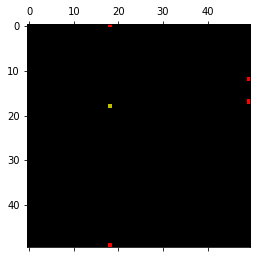

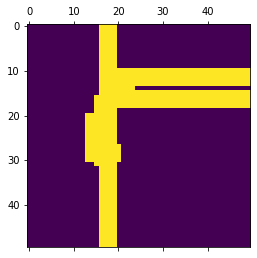

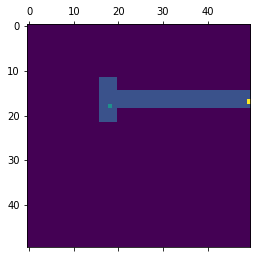

In [18]:
#MAPPO https://github.com/marlbenchmark/on-policy

#maddpg.load("ModelCheckpoints", version=3)
episode = 0
while episode < 1:
    episode += 1
    total_reward = 0
    terminal = False
    step = 0
    states = [
        t.tensor(st, dtype=t.float32).view(1, observe_dim) for st in env.reset()
    ]
    tmp_observations_list = [[] for _ in range(agent_num)]

    while not terminal and step <= max_steps:
        step += 1
        with t.no_grad():
            old_states = states
            # agent model inference
            results = maddpg.act_discrete(
                [{"state": st} for st in states]
            )
            actions = [int(r[0]) for r in results]
            action_probs = [r[1] for r in results]
            states, rewards, terminals, _ = env.step(actions)
            states = [
                t.tensor(st, dtype=t.float32).view(1, observe_dim) for st in states
            ]
            total_reward += float(sum(rewards))# / agent_num
            #plt.matshow(np.reshape(states[0], (50,50)) )
            for tmp_observations, ost, act, st, rew, term in zip(
                tmp_observations_list,
                old_states,
                action_probs,
                states,
                rewards,
                terminals,
            ):
                tmp_observations.append(
                    {
                        "state": {"state": ost},
                        "action": {"action": act},
                        "next_state": {"state": st},
                        "reward": float(rew),
                        "terminal": term or step == max_steps,
                    }
                )

    #maddpg.store_episodes(tmp_observations_list)
    env.display()
    plt.matshow(env.seen)
    plt.matshow(np.reshape(states[1],(50,50)))
    # total reward is divided by steps here, since:
    # "Agents are rewarded based on minimum agent distance
    #  to each landmark, penalized for collisions"
    #total_reward /= 
    totalAvgReward = total_reward / 50 / 50#step
    maddpg.discount = 0.99#episode / max_episodes *0.7 + 0.3
    print(f"Episode {episode}")
    # update, update more if episode is longer, else less
    #if episode > 100:
    #    for _ in range(step):
    #        maddpg.update()

        # show reward
    smoothed_total_reward = smoothed_total_reward * 0.9 + totalAvgReward * 0.1
    print(f"Episode {episode} total reward={smoothed_total_reward:.2f}")
    print(f"Episode {episode} reward={total_reward}")
    print(f"Episode {episode} avg reward={totalAvgReward}")
    
    #if smoothed_total_reward > solved_reward and episode > 100:
    #    reward_fulfilled += 1
    #    if reward_fulfilled >= solved_repeat:
    #        logger.info("Environment solved!")
    #        exit(0)
    #else:
    #    reward_fulfilled = 0

In [75]:
import torch

from elegantrl.agents.AgentBase import AgentBase
from elegantrl.agents.net import Actor, Critic
from elegantrl.agents.AgentDDPG import AgentDDPG

class AgentMADDPG(AgentBase):
    """
    Bases: ``AgentBase``
    Multi-Agent DDPG algorithm. “Multi-Agent Actor-Critic for Mixed Cooperative-Competitive”. R Lowe. et al.. 2017.
    :param net_dim[int]: the dimension of networks (the width of neural networks)
    :param state_dim[int]: the dimension of state (the number of state vector)
    :param action_dim[int]: the dimension of action (the number of discrete action)
    :param learning_rate[float]: learning rate of optimizer
    :param gamma[float]: learning rate of optimizer
    :param n_agents[int]: number of agents
    :param if_per_or_gae[bool]: PER (off-policy) or GAE (on-policy) for sparse reward
    :param env_num[int]: the env number of VectorEnv. env_num == 1 means don't use VectorEnv
    :param agent_id[int]: if the visible_gpu is '1,9,3,4', agent_id=1 means (1,9,4,3)[agent_id] == 9
    """

    #def __init__(self):
        

    def __init__(
        self,
        net_dim,
        state_dim,
        action_dim,
        gpu_id,
        args,
        learning_rate=1e-4,
        gamma=0.95,
        n_agents=1,
        if_use_per=False,
        env_num=1,
        agent_id=0,
        
    ):
        #self.ClassAct = Actor
        #self.ClassCri = Critic
        #self.if_use_cri_target = True
        #self.if_use_act_target = True
        #super().__init__(net_dim=net_dim, state_dim=state_dim, action_dim=action_dim)
        
        self.__name__ = "MADDPG"
        self.agents = [AgentDDPG(net_dim=net_dim, state_dim=state_dim,action_dim=action_dim, gpu_id=gpu_id) for i in range(n_agents)]
        self.explore_env = self.explore_one_env
        self.if_off_policy = True
        self.n_agents = n_agents

        #for i in range(self.n_agents):
        #    self.agents[i].init(
        #        net_dim,
        #        state_dim,
        #        action_dim,
        #        learning_rate=1e-4,
        #        n_agents=self.n_agents,
        #        if_use_per=False,
        #        env_num=1,
        #        agent_id=0,
        #    )
        self.n_states = state_dim
        self.n_actions = action_dim

        self.batch_size = net_dim
        self.gamma = gamma
        self.update_tau = 0
        self.device = torch.device(
            f"cuda:{agent_id}"
            if (torch.cuda.is_available() and (agent_id >= 0))
            else "cpu"
        )

    def update_agent(self, rewards, dones, actions, observations, next_obs, index):
        """
        Update the single agent neural networks, called by update_net.
        :param rewards: reward list of the sampled buffer
        :param dones: done list of the sampled buffer
        :param actions: action list of the sampled buffer
        :param observations: observation list of the sampled buffer
        :param next_obs: next_observation list of the sample buffer
        :param index: ID of the agent
        """
        curr_agent = self.agents[index]
        curr_agent.cri_optim.zero_grad()
        all_target_actions = []
        for i in range(self.n_agents):
            if i == index:
                all_target_actions.append(curr_agent.act_target(next_obs[:, index]))
            if i != index:
                action = self.agents[i].act_target(next_obs[:, i])
                all_target_actions.append(action)
        action_target_all = (
            torch.cat(all_target_actions, dim=1)
            .to(self.device)
            .reshape(actions.shape[0], actions.shape[1] * actions.shape[2])
        )

        target_value = rewards[:, index] + self.gamma * curr_agent.cri_target(
            next_obs.reshape(next_obs.shape[0], next_obs.shape[1] * next_obs.shape[2]),
            action_target_all,
        ).detach().squeeze(dim=1)
        actual_value = curr_agent.cri(
            observations.reshape(
                next_obs.shape[0], next_obs.shape[1] * next_obs.shape[2]
            ),
            actions.reshape(actions.shape[0], actions.shape[1] * actions.shape[2]),
        ).squeeze(dim=1)
        vf_loss = curr_agent.loss_td(actual_value, target_value.detach())
        curr_agent.act_optim.zero_grad()
        curr_pol_out = curr_agent.act(observations[:, index])
        curr_pol_vf_in = curr_pol_out
        all_pol_acs = []
        for i in range(self.n_agents):
            if i == index:
                all_pol_acs.append(curr_pol_vf_in)
            else:
                all_pol_acs.append(actions[:, i])
        pol_loss = -torch.mean(
            curr_agent.cri(
                observations.reshape(
                    observations.shape[0], observations.shape[1] * observations.shape[2]
                ),
                torch.cat(all_pol_acs, dim=1)
                .to(self.device)
                .reshape(actions.shape[0], actions.shape[1] * actions.shape[2]),
            )
        )
        curr_agent.act_optim.zero_grad()
        pol_loss.backward()
        curr_agent.act_optim.step()
        curr_agent.cri_optim.zero_grad()
        vf_loss.backward()
        curr_agent.cri_optim.step()

    def update_net(self, buffer, batch_size, repeat_times, soft_update_tau):
        """
        Update the neural networks by sampling batch data from ``ReplayBuffer``.
        :param buffer: the ReplayBuffer instance that stores the trajectories.
        :param batch_size: the size of batch data for Stochastic Gradient Descent (SGD).
        :param repeat_times: the re-using times of each trajectory.
        :param soft_update_tau: the soft update parameter.
        """
        buffer.update_now_len()
        self.batch_size = batch_size
        self.update_tau = soft_update_tau
        rewards, dones, actions, observations, next_obs = buffer.sample_batch(
            self.batch_size
        )
        for index in range(self.n_agents):
            self.update_agent(rewards, dones, actions, observations, next_obs, index)

        for agent in self.agents:
            self.soft_update(agent.cri_target, agent.cri, self.update_tau)
            self.soft_update(agent.act_target, agent.act, self.update_tau)

        return

    def explore_one_env(self, env, target_step) -> list:
        """
        Exploring the environment for target_step.
        param env: the Environment instance to be explored.
        param target_step: target steps to explore.
        """
        traj_temp = []
        k = 0
        for _ in range(target_step):
            k += 1
            actions = []
            for i in range(self.n_agents):
                action = self.agents[i].select_actions(self.states[i])
                actions.append(action)
            # print(actions)
            next_s, reward, done, _ = env.step(actions)
            traj_temp.append((self.states, reward, done, actions))
            global_done = all(done[i] is True for i in range(self.n_agents))
            if global_done or k > 100:
                state = env.reset()
                k = 0
            else:
                state = next_s
        self.states = state
        return traj_temp

    def select_actions(self, states):
        """
        Select continuous actions for exploration
        :param state: states.shape==(n_agents,batch_size, state_dim, )
        :return: actions.shape==(n_agents,batch_size, action_dim, ),  -1 < action < +1
        """
        actions = []
        for i in range(self.n_agents):
            action = self.agents[i].select_actions(states[i])
            actions.append(action)
        return actions

    def save_or_load_agent(self, cwd, if_save):
        """
        save or load training files for Agent
        :param cwd: Current Working Directory. ElegantRL save training files in CWD.
        :param if_save: True: save files. False: load files.
        """
        for i in range(self.n_agents):
            self.agents[i].save_or_load_agent(cwd + "/" + str(i), if_save)

In [76]:
#from elegantrl_helloworld.config import Arguments
#from elegantrl_helloworld.run import train_agent, evaluate_agent
#from elegantrl_helloworld.env import get_gym_env_args
#from elegantrl.agents import AgentMADDPG


from elegantrl.train.run import train_and_evaluate

from elegantrl.train.config import Arguments
from elegantrl.train.run import *

agent = AgentMADDPG#AgentMADDPG(net_dim = 2**7, state_dim=50*50, action_dim=4, n_agents=5)




env = Sea()#50,50)

env_func = Sea

#env_args = get_gym_env_args(env, if_print=True)
args = Arguments(agent, env=env)

args.if_discrete = True

'''reward shaping'''
args.reward_scale = 2 ** 0
args.gamma = 0.99

'''network update'''
args.target_step = args.max_step // 2
args.net_dim = 2 ** 7
args.batch_size = 2 ** 7
args.repeat_times = 2 ** 0
args.explore_noise = 0.1

'''evaluate'''
args.eval_gap = 2 ** 7
args.eval_times = 2 ** 4
args.break_step = int(4e5)
args.learner_gpus = 0

#train_agent(args)
#evaluate_agent(args)

train_and_evaluate(args)

| Arguments Remove cwd: ./Sea_MADDPG_0


AssertionError: 

In [4]:
maddpg.save("ModelCheckpoints", version = 3)
#number 3 stopped at 875

[2022-06-15 00:02:41,461] <WARNING>:default_logger:Save name for module "{r}" is not specified, module name is used.
[2022-06-15 00:02:41,485] <WARNING>:default_logger:Save name for module "{r}" is not specified, module name is used.


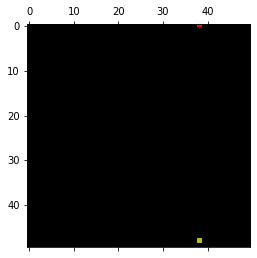

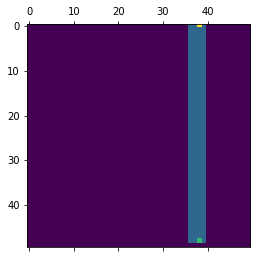

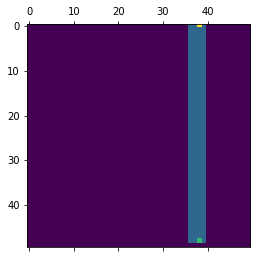

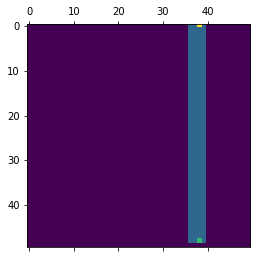

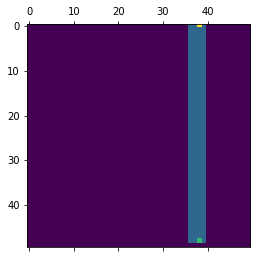

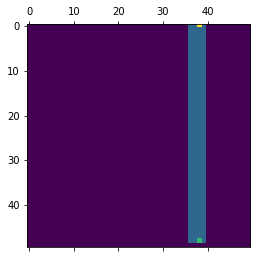

In [18]:
env.display()
for i in range(len(states)):
    plt.matshow( np.reshape(states[i], (50,50)))